In [1]:
%matplotlib inline
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.ndimage.filters import gaussian_filter

from app.models import ExperimentResult

In [63]:
def f(x):
    return (97.78*(x)+0.910)/10000

def inst_to_df(inst):
    i = json.loads(inst.i)
    v = json.loads(inst.v)
    df = pd.DataFrame.from_dict({'i': i, 'v': v})\
            .sort_values(by=['v'])
        
    X = df.v.values.reshape([df.v.shape[0], 1])
    Y = df.i
    n = 1000
    model = make_pipeline(\
                PolynomialFeatures(5), 
                RandomForestRegressor(n_estimators=100, min_samples_split=100)\
            ).fit(X, Y)
    X_ = np.linspace(df.v.min(), df.v.max(), n)
    mdf = pd.DataFrame.from_dict({'v':X_, 'i':model.predict(X_.reshape(-1, 1))})
    mdf.i = gaussian_filter(mdf.i, sigma=20)
    mdf = mdf.round(2)

    mdf.v = (mdf.v/4095)*5.0 
    mdf.i = ((mdf.i/4095)*5.0)/(0.033)
    mdf.v = round(mdf.v,2)
    return mdf 

def peak(df):
    return df[df.v==0.47].i.max()

def peak2(df):
    return df[(df.v>0.35)&(df.v<0.55)].i.max()

def _find_peak(pk):
    try:
        inst = ExperimentResult.objects.get(pk=pk)
        return peak(inst_to_df(inst))
    except Exception as err:
        return None
    
def _find_peak2(pk):
    try:
        inst = ExperimentResult.objects.get(pk=pk)
        return peak2(inst_to_df(inst))
    except Exception as err:
        return None

In [64]:
exp_result = pd.read_csv('experiment_result.csv')
df = exp_result.copy()
df['peak'] = df.exp.apply(_find_peak)

In [65]:
exp_result = pd.read_csv('experiment_result.csv')
df2 = exp_result.copy()
df2['peak'] = df.exp.apply(_find_peak2)

In [66]:
df2.peak - df.peak

0     0.234950
1    -0.137270
2     0.384430
3    -0.025160
4    -0.026270
5     0.076220
6     0.064010
7     0.056980
8     0.157990
9     0.659711
10    0.194250
11    0.955711
12    0.035890
13    0.005550
14    0.182410
15         NaN
16         NaN
17         NaN
18    0.167240
19    0.316720
20    0.052910
21    0.660081
22    0.001850
23    0.274540
24    0.132460
25    0.040700
26    0.345210
27   -0.020350
28   -0.202390
29   -0.104340
        ...   
63    0.439190
64    0.265660
65   -0.049210
66    0.790321
67   -0.058090
68   -0.031820
69    0.991231
70    0.280460
71    0.276760
72    0.008880
73    1.253561
74    3.789174
75    1.256891
76    0.148370
77    3.715544
78    0.303030
79    1.163281
80    1.018611
81    0.222000
82    0.152070
83    0.684131
84    0.024790
85    1.739372
86    0.917971
87   -0.044770
88    1.600252
89    1.329041
90    0.222740
91    0.327820
92    0.194620
Name: peak, Length: 93, dtype: float64

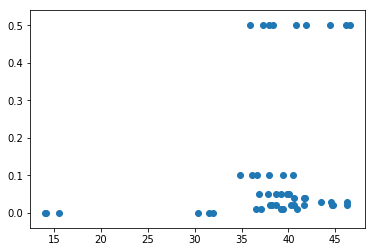

In [5]:
mdf = df[df.cell==130]
plt.scatter(mdf.peak, mdf.ua)

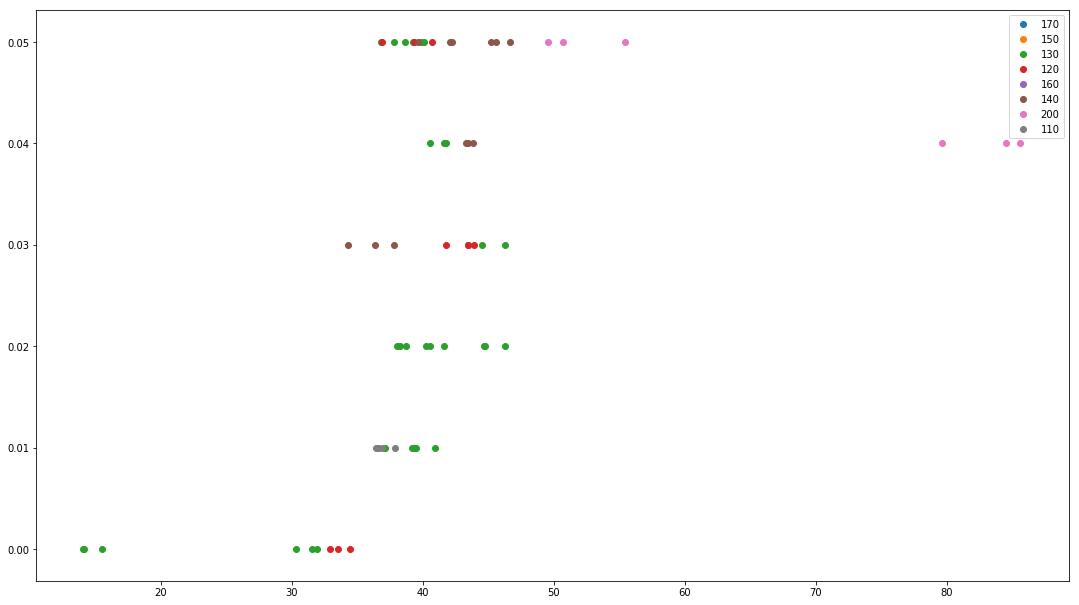

In [6]:
lst = range(1459, 1552)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for group in df.cell.unique():# [130]:
#     if not df.exp in lst: continue
    _mdf = df[df.cell==group]
    _mdf = _mdf[(_mdf.exp.isin(lst))]
#     _mdf = _mdf[(_mdf.ua<=0.1)]
    _mdf = _mdf[(_mdf.ua<0.1)]
    ax.scatter(_mdf.peak, _mdf.ua, label=group)
ax.legend()
plt.show()

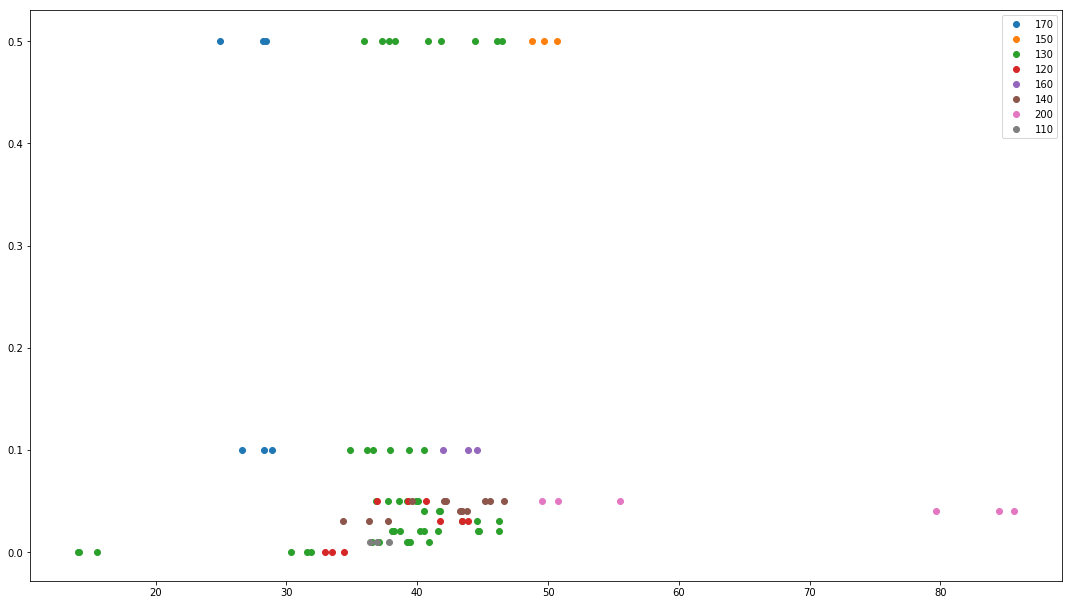

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for group in df.cell.unique():
#     if group != 130: continue
    _mdf = df[df.cell==group]
    ax.scatter(_mdf.peak, _mdf.ua, label=group)
ax.legend()
plt.show()

No handles with labels found to put in legend.


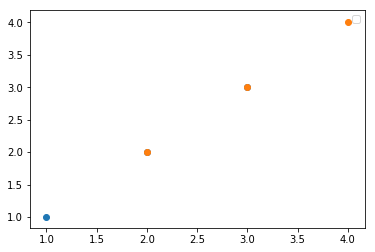

In [8]:
x = [[1,2,3], [2,3,4]]
y = [[1,2,3], [2,3,4]]
plt.scatter(x[0], y[0])
plt.scatter(x[1], y[1])
plt.legend()
plt.show()

In [9]:
lst = list(range(1459, 1552))
for i, pk in enumerate(lst, start=1):
    try:
        df = inst_to_df(ExperimentResult.objects.get(pk=pk))
        p = peak(df)
        result = f(p)
        print('{} {} {}'.format(pk, result, p))
    except ValueError as err:
        print('{} {}'.format(pk, err))
    if i%3==0 and i != 0:
        print() 

1459 0.24372155389055383 24.91619491619491
1460 0.2777186183076183 28.39308839308839
1461 0.2749690419580419 28.11188811188811

1462 0.47758387601287594 48.83338883338883
1463 0.4866610958300958 49.76171976171976
1464 0.4961398985088985 50.731120731120726

1465 0.37351241118141115 38.18995818995819
1466 0.39889534232434226 40.78588078588078
1467 0.41112372135272124 42.03648203648203

1468 0.4392707002997003 44.91508491508491
1469 0.45506991071891073 46.53087653087653
1470 0.4505548169238168 46.06911606911606

1471 0.3521453086543086 36.004736004736
1472 0.365187706996707 37.33858733858734
1473 0.3709184029674029 37.92466792466792

1474 arrays must all be same length
1475 arrays must all be same length
1476 arrays must all be same length

1477 0.33996034398934394 34.75857475857475
1478 0.3587804705294705 36.68331668331668
1479 0.370411902060902 37.87286787286787

1480 0.2621328618418618 26.799126799126796
1481 0.2760435474525474 28.22177822177822
1482 0.28302602423502415 28.935878935878

In [14]:
df

,exp,aa,ua,cell,lopp,peak
0,1459,0.1,0.50,170,5,24.959855
1,1460,0.1,0.50,170,5,28.386428
2,1461,0.1,0.50,170,5,28.161838
3,1462,0.1,0.50,150,5,48.738299
4,1463,0.1,0.50,150,5,49.577830
5,1464,0.1,0.50,150,5,50.693011
6,1465,0.1,0.50,130,5,38.255818
7,1466,0.1,0.50,130,5,40.798461
8,1467,0.1,0.50,130,5,42.003922
9,1468,0.1,0.50,130,5,44.472564


In [15]:
mdf = df[df.ua<0.1]
mdf = mdf.dropna()

In [16]:
mdf

,exp,aa,ua,cell,lopp,peak
30,1489,0.1,0.05,120,5,37.008177
31,1490,0.1,0.05,120,5,39.272579
32,1491,0.1,0.05,120,5,40.601621
33,1492,0.1,0.05,140,5,39.500870
34,1493,0.1,0.05,140,5,42.204092
35,1494,0.1,0.05,140,5,42.223332
36,1495,0.1,0.05,140,5,45.379805
37,1496,0.1,0.05,140,5,45.221445
38,1497,0.1,0.05,140,5,46.782847
39,1498,0.1,0.05,130,5,36.934177


In [17]:
X = mdf[['cell', 'peak']]
Y = mdf.ua

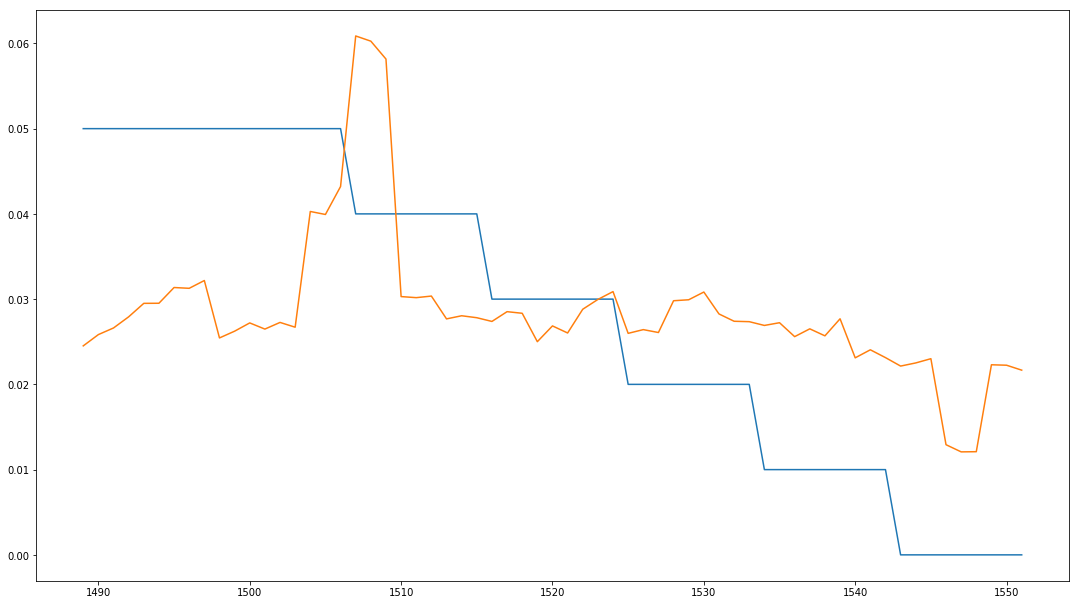

In [18]:
model = LinearRegression().fit(X, Y)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(mdf.exp, mdf.ua)
ax.plot(mdf.exp, model.predict(X))
plt.show()

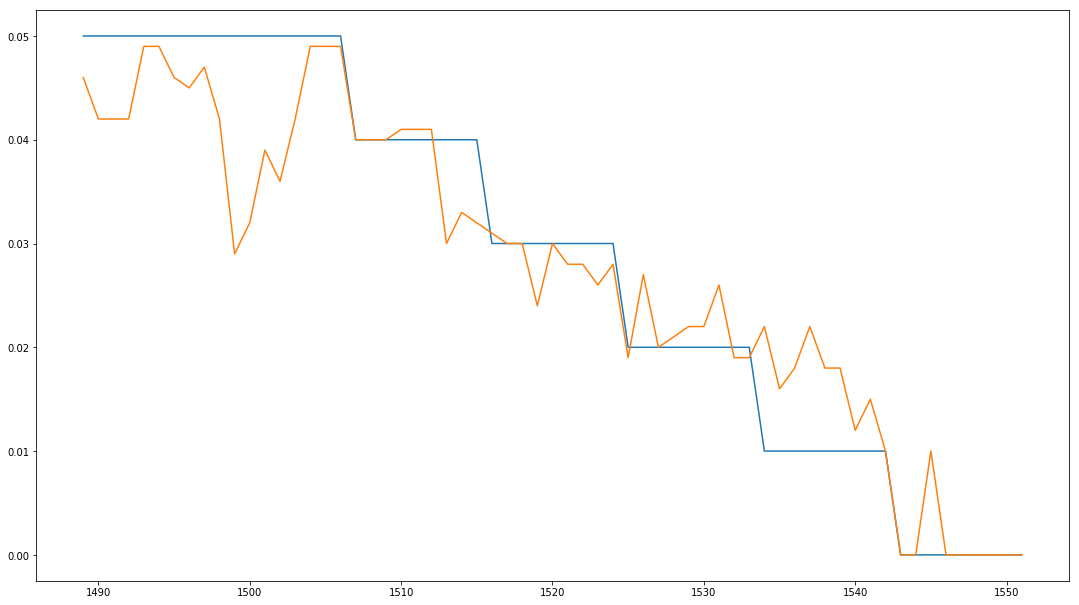

In [19]:
model = RandomForestRegressor().fit(X, Y)
model.score(X, Y)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(mdf.exp, mdf.ua)
ax.plot(mdf.exp, model.predict(X))
plt.show()

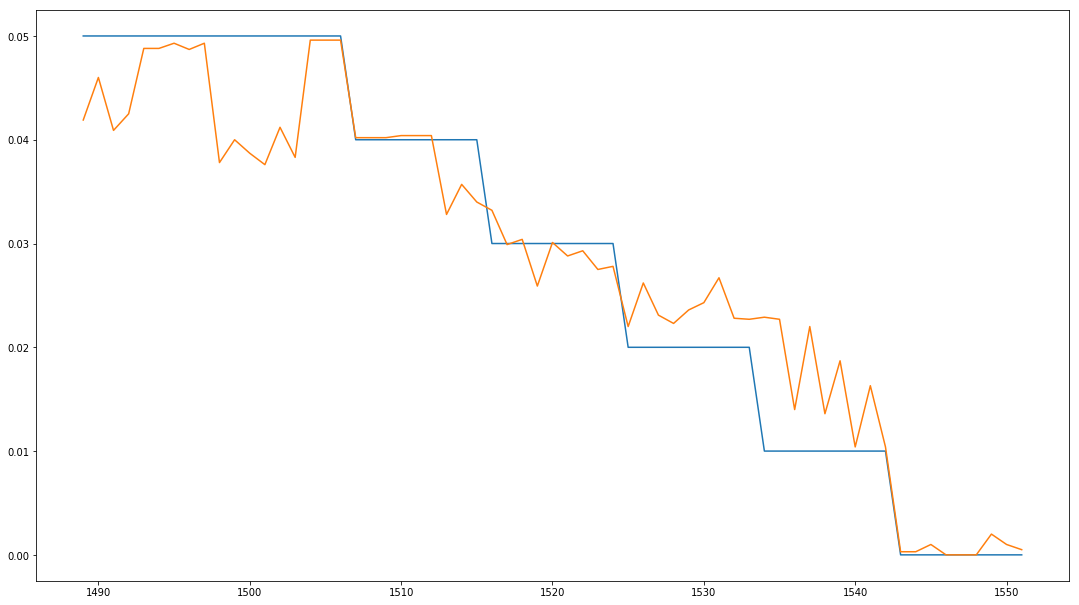

In [56]:
model = make_pipeline(\
            PolynomialFeatures(5), 
            RandomForestRegressor(n_estimators=100)
        ).fit(X, Y)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(mdf.exp, mdf.ua)
ax.plot(mdf.exp, model.predict(X))
plt.show()

In [57]:
from sklearn.externals import joblib
joblib.dump(model, 'conc_model.pkl') 

['conc_model.pkl']

In [58]:
lmodel = joblib.load('conc_model.pkl')

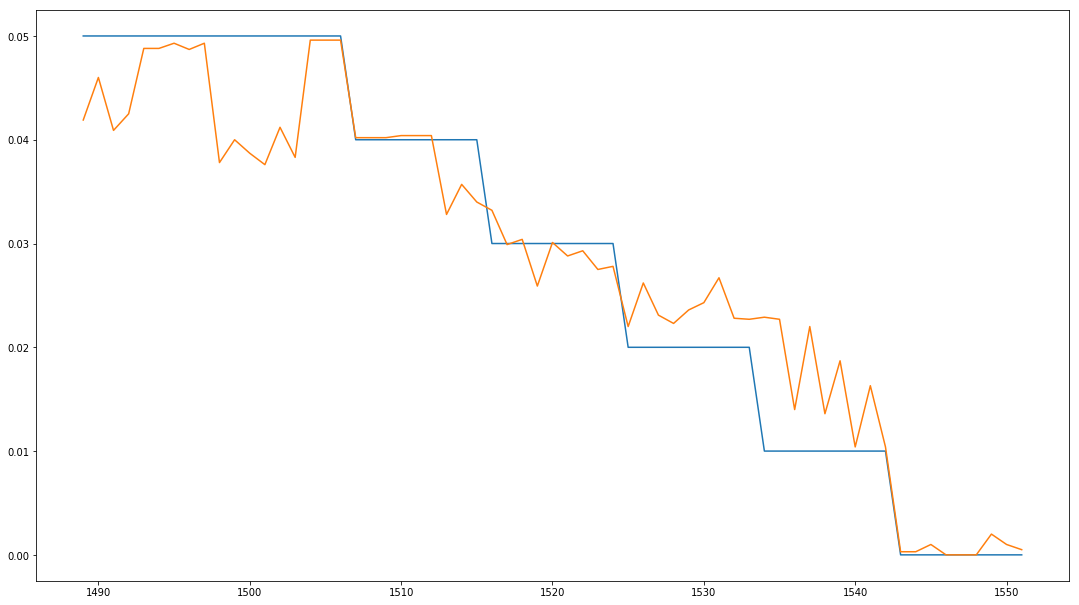

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(mdf.exp, mdf.ua)
ax.plot(mdf.exp, lmodel.predict(X))
plt.show()

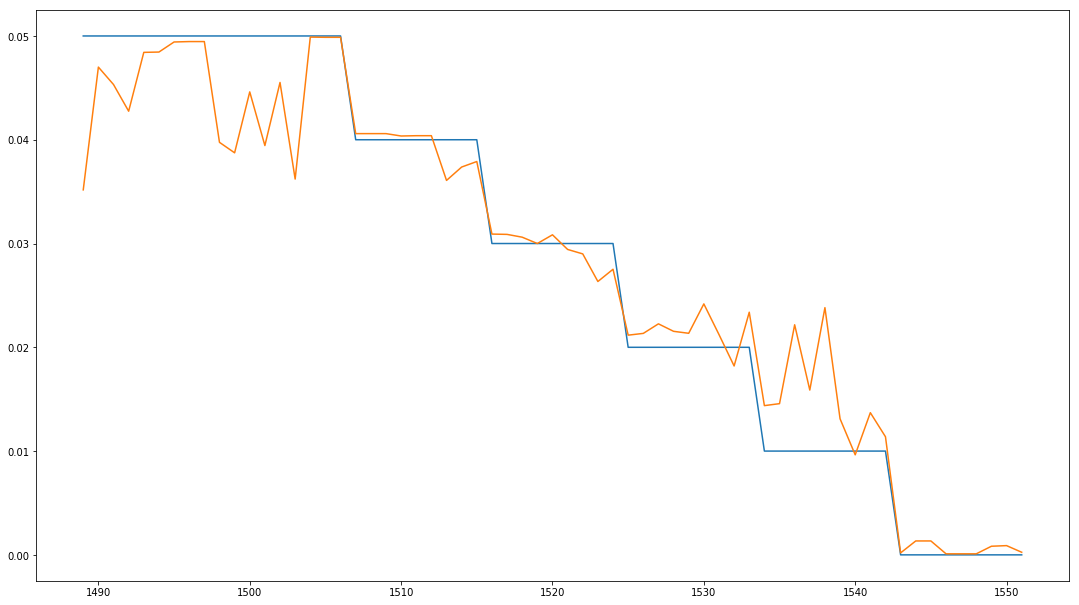

In [71]:
mdf = df2[df.ua<0.1]
mdf = mdf.dropna()
X = mdf[['cell', 'peak']]
Y = mdf.ua
model = make_pipeline(\
            PolynomialFeatures(5), 
            RandomForestRegressor(n_estimators=1000)
        ).fit(X, Y)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(mdf.exp, mdf.ua)
ax.plot(mdf.exp, model.predict(X))
plt.show()

In [72]:
from sklearn.externals import joblib
joblib.dump(model, 'conc_model.pkl') 

['conc_model.pkl']

In [73]:
df2

,exp,aa,ua,cell,lopp,peak
0,1459,0.1,0.50,170,5,25.234025
1,1460,0.1,0.50,170,5,28.256928
2,1461,0.1,0.50,170,5,28.420838
3,1462,0.1,0.50,150,5,48.683909
4,1463,0.1,0.50,150,5,49.636660
5,1464,0.1,0.50,150,5,50.756281
6,1465,0.1,0.50,130,5,38.365338
7,1466,0.1,0.50,130,5,40.927221
8,1467,0.1,0.50,130,5,41.935842
9,1468,0.1,0.50,130,5,45.194435
